# ML First Project <div dir='\n'> 
Fatemeh Karimi Barikarasfi <div dir='\n'> 610301060

Use

    - Decision Tree
    - Random Forest
    - XGBoost
    - SVM
methoods for classification of the data in the below link, the data is physiological signals for activity recognition.  


[Activity Recognition Using Wearable Physiological
Measurements](https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measureme)

## Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import sklearn.metrics

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

## Preparing Data

In [4]:
labels = np.loadtxt('labels.txt', dtype = str, delimiter = '\n')
data = np.loadtxt('data.txt', delimiter = ',')
np.random.shuffle(data)
data

array([[ 3.40000e+01,  5.44444e-02,  2.92649e-01, ...,  6.30535e+06,
         1.05932e+06,  2.00000e+00],
       [ 1.90000e+01,  2.26529e-03,  6.43774e-02, ...,  2.06189e+05,
         1.15881e+05,  1.00000e+00],
       [ 3.60000e+01,  4.21745e-01,  3.17231e+00, ...,  2.37144e+08,
         3.43063e+07,  4.00000e+00],
       ...,
       [ 2.50000e+01,  1.46442e-02,  1.74183e-01, ...,  2.38805e+08,
         1.18213e+08,  3.00000e+00],
       [ 6.00000e+00,  4.69888e-02,  4.03911e-01, ...,  5.45763e+06,
         1.22354e+06,  4.00000e+00],
       [ 4.00000e+00, -2.89052e-03,  2.69954e-01, ...,  1.65167e+06,
         1.03339e+06,  1.00000e+00]])

In [6]:
data_set = pd.DataFrame(data, columns = labels)
data_set

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
0,34.0,0.054444,0.292649,0.052028,0.036730,0.139476,2.86120,0.972730,-0.851270,-0.142270,...,1014.42,3.192890e+09,0.264911,11.41740,77.30310,37.13290,9.00948,6305350.0,1059320.0,2.0
1,19.0,0.002265,0.064377,-0.009486,-0.014047,3.270040,17.94580,0.470953,-0.097047,-0.031047,...,1016.01,1.047330e+08,0.006888,1.73155,11.23050,5.38060,1.09424,206189.0,115881.0,1.0
2,36.0,0.421745,3.172310,0.437018,0.102674,0.052119,1.48695,4.611670,-3.847330,-2.490330,...,1015.83,1.204200e+11,0.079136,317.02400,2605.50000,989.67700,29.38570,237144000.0,34306300.0,4.0
3,23.0,-0.093330,0.179706,-0.090427,-0.089733,-0.276142,4.04637,0.513267,-0.854733,-0.201733,...,1015.75,4.398220e+08,0.007807,2.98510,17.85990,8.81519,1.77116,866241.0,831861.0,3.0
4,8.0,-0.001690,0.925411,0.011426,0.037593,0.077683,9.46075,4.644590,-3.814410,-0.336407,...,1015.62,2.067860e+10,0.159101,56.66440,445.91100,181.43000,21.35750,40738000.0,1978790.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,18.0,-0.005244,0.164727,-0.021474,-0.018167,1.547980,7.58182,0.869833,-0.295167,-0.103167,...,1015.80,1.583400e+08,0.003638,0.79137,5.02704,2.51510,0.51315,311834.0,2870310.0,2.0
4476,37.0,-0.149902,0.152016,-0.145297,-0.139264,-0.150529,3.88244,0.480736,-0.736264,-0.242264,...,1015.78,4.006320e+08,0.005392,1.80765,11.69900,5.48713,1.01363,789022.0,1250520.0,1.0
4477,25.0,0.014644,0.174183,0.002225,-0.004361,0.555731,4.31748,1.055640,-0.630361,-0.085361,...,1015.81,1.212610e+11,0.004037,304.94900,2517.33000,897.28000,5.76390,238805000.0,118213000.0,3.0
4478,6.0,0.046989,0.403911,0.061268,0.076100,-0.222624,2.90272,1.387100,-1.640900,-0.215900,...,1015.68,2.770390e+09,0.043354,9.76160,66.44440,31.41600,5.58521,5457630.0,1223540.0,4.0


In [7]:
y = np.array(data_set['Activity: 1-neutral, 2-emotional, 3-mental and 4-physical'], dtype = int)
x = data[:, 1: 534]

### Spliting data into train and test

In [10]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

## Models

### Decision Tree

In [11]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None]}
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree_model = sklearn.model_selection.GridSearchCV(decision_tree, param_grid_dt, scoring = 'accuracy', cv = 5)
decision_tree_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [12]:
decision_tree_model.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [15]:
y_hat_decision_tree_model = decision_tree_model.predict(x_test)
CM_decision_tree_model = sklearn.metrics.confusion_matrix(y_test, y_hat_decision_tree_model)
CM_decision_tree_model

array([[324,   2,  10,   0],
       [  1, 290,  43,   2],
       [  3,  31, 302,   0],
       [  0,   1,   1, 334]])

### Random Forest

In [16]:
param_grid_rf = {'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']}
random_forest = sklearn.ensemble.RandomForestClassifier()
random_forest_model = sklearn.model_selection.GridSearchCV(random_forest, param_grid_rf, scoring = 'accuracy', cv = 5)
random_forest_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [17]:
random_forest_model.best_params_

{'criterion': 'entropy', 'n_estimators': 50}

In [20]:
y_hat_random_forest_model = random_forest_model.predict(x_test)
CM_random_forest_model = sklearn.metrics.confusion_matrix(y_test, y_hat_random_forest_model)
CM_random_forest_model

array([[330,   0,   6,   0],
       [  0, 329,   7,   0],
       [  0,   8, 328,   0],
       [  0,   1,   0, 335]])

### XGBoost

In [21]:
xgboost_model = XGBClassifier(objective = 'multi:softmax')
xgboost_model.fit(x_train, y_train)

[14:10:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [24]:
y_hat_xgboost_model = xgboost_model.predict(x_test)
CM_xgboost_model = sklearn.metrics.confusion_matrix(y_test, y_hat_xgboost_model)
CM_xgboost_model

array([[332,   0,   4,   0],
       [  0, 330,   6,   0],
       [  0,   4, 332,   0],
       [  0,   0,   1, 335]])

### SVM

####  SVM ( kernel = Linear )

In [25]:
svm_linear_model = sklearn.svm.LinearSVC()
svm_linear_model.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [28]:
y_hat_svm_linear_model = svm_linear_model.predict(x_test)
CM_svm_linear_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_linear_model)
CM_svm_linear_model

array([[  4, 201, 116,  15],
       [ 10, 212, 101,  13],
       [ 16, 206,  83,  31],
       [  0, 156,  33, 147]])

####  SVM ( kernel = Poly )

In [29]:
param_grid_svm_poly = {'degree': [2, 3, 4]}
svm_poly = sklearn.svm.SVC(kernel = 'poly', decision_function_shape = 'ovr')
svm_poly_model = sklearn.model_selection.GridSearchCV(svm_poly, param_grid_svm_poly, scoring = 'accuracy', cv = 5)
svm_poly_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'degree': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [30]:
svm_poly_model.best_params_

{'degree': 2}

In [33]:
y_hat_svm_poly_model = svm_poly_model.predict(x_test)
CM_svm_poly_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_poly_model)
CM_svm_poly_model

array([[323,   0,   0,  13],
       [328,   0,   0,   8],
       [306,   0,   0,  30],
       [275,   0,   0,  61]])

#### SVM ( kernel = rbf )

In [34]:
param_grid_svm_rbf = {'C': [1, 10, 100, 200, 500, 1000]}
svm_rbf = sklearn.svm.SVC(kernel = 'rbf', decision_function_shape = 'ovr')
svm_rbf_model = sklearn.model_selection.GridSearchCV(svm_rbf, param_grid_svm_rbf, scoring = 'accuracy', cv = 5)
svm_rbf_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
svm_rbf_model.best_params_

{'C': 200}

In [38]:
y_hat_svm_rbf_model = svm_rbf_model.predict(x_test)
CM_svm_rbf_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_rbf_model)
CM_svm_rbf_model

array([[268,  11,  18,  39],
       [236,  23,  34,  43],
       [204,  26,  42,  64],
       [ 90,  15,  56, 175]])

## Results

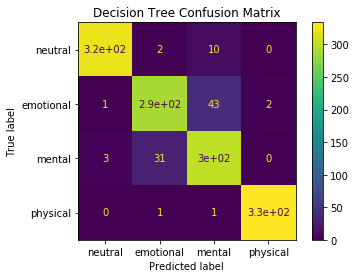

In [39]:
sklearn.metrics.ConfusionMatrixDisplay(CM_decision_tree_model, display_labels = ['neutral', 'emotional', 'mental', 'physical'], ).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

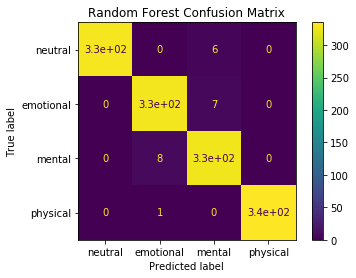

In [40]:
sklearn.metrics.ConfusionMatrixDisplay(CM_random_forest_model, display_labels = ['neutral', 'emotional', 'mental', 'physical']).plot()
plt.title('Random Forest Confusion Matrix')

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

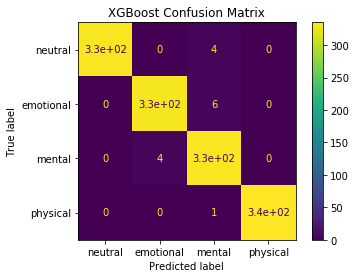

In [41]:
sklearn.metrics.ConfusionMatrixDisplay(CM_xgboost_model, display_labels = ['neutral', 'emotional', 'mental', 'physical']).plot()
plt.title('XGBoost Confusion Matrix')

Text(0.5, 1.0, 'SVM(kernek = Linear) Confusion Matrix')

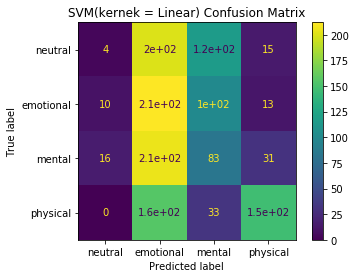

In [42]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_linear_model, display_labels = ['neutral', 'emotional', 'mental', 'physical']).plot()
plt.title('SVM(kernek = Linear) Confusion Matrix')

Text(0.5, 1.0, 'SVM(kernel = Poly) Confusion Matrix')

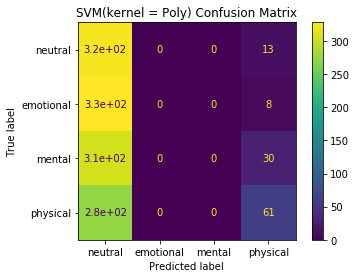

In [43]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_poly_model, display_labels = ['neutral', 'emotional', 'mental', 'physical']).plot()
plt.title('SVM(kernel = Poly) Confusion Matrix')

Text(0.5, 1.0, 'SVM(kernel = rbf) Confusion Matrix')

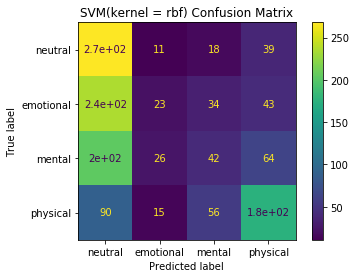

In [44]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_rbf_model, display_labels = ['neutral', 'emotional', 'mental', 'physical']).plot()
plt.title('SVM(kernel = rbf) Confusion Matrix')

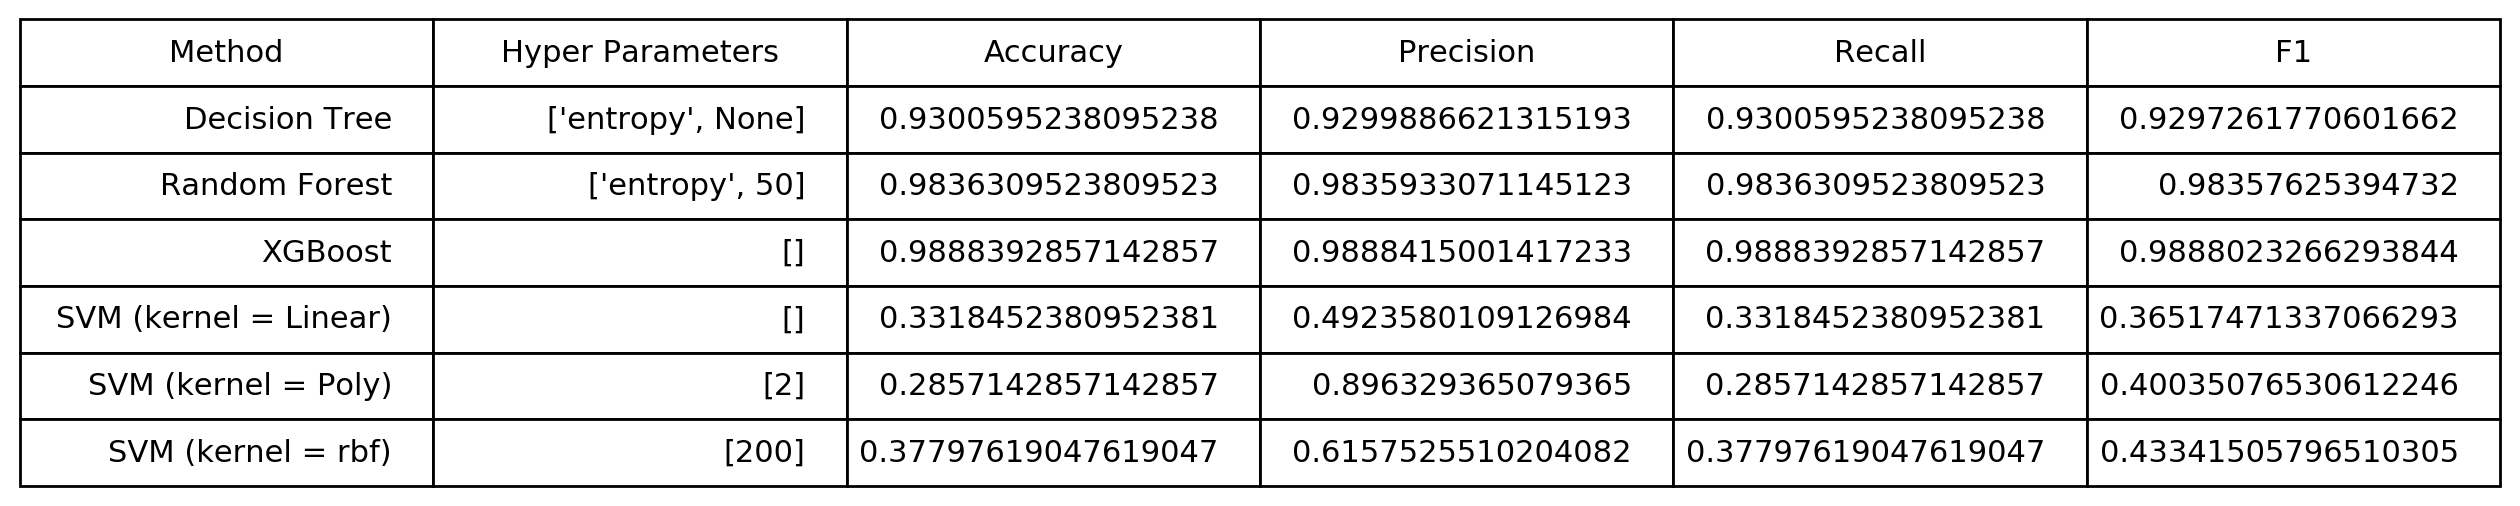

In [45]:
plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_decision_tree_model, y_test),
        sklearn.metrics.precision_score(y_hat_decision_tree_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_decision_tree_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_decision_tree_model, y_test, average="weighted")
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_random_forest_model, y_test),
        sklearn.metrics.precision_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_random_forest_model, y_test, average="weighted")
    ],
    [
        "XGBoost",
        list([]),
        sklearn.metrics.accuracy_score(y_hat_xgboost_model, y_test),
        sklearn.metrics.precision_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_xgboost_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = Linear)",
        list([]),
        sklearn.metrics.accuracy_score(y_hat_svm_linear_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_linear_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = Poly)",
        list(svm_poly_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_svm_poly_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_poly_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = rbf)",
        list(svm_rbf_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_svm_rbf_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_rbf_model, y_test, average="weighted")
    ],
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

## Conclusion

the decision tree model, random forest, and XGBoost are good fit, but SVM's with Linear, Poly, and rbf kernel are not good fit for our purpose.